<a href="https://colab.research.google.com/github/aida-wofford/Andres/blob/main/slit_c_balmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
__author__ = 'Aida Wofford <awofford@astro.unam.mx>'
__version__ = '20210505'
__datasets__ = ['VLT FORS1']  # datos usados en este notebook
__keywords__ = ['Andrés', 'Doctorado', 'VLT', 'FORS1'], # palabras clave relevantes a este notebook

Toda la rendija C.

In [30]:
import numpy as np
blue=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intB_34w_6pix.txt', skiprows=1, delimiter=" ")
xb, yb = np.transpose(blue)
red=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intR_34w_6pix.txt', skiprows=1, delimiter=" ")
xr, yr = np.transpose(red)
ld=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intLD_34w_6pix.txt', skiprows=1, delimiter=" ")
xl, yl = np.transpose(ld)

Text(0.5, 1.0, 'Toda la rendija C')

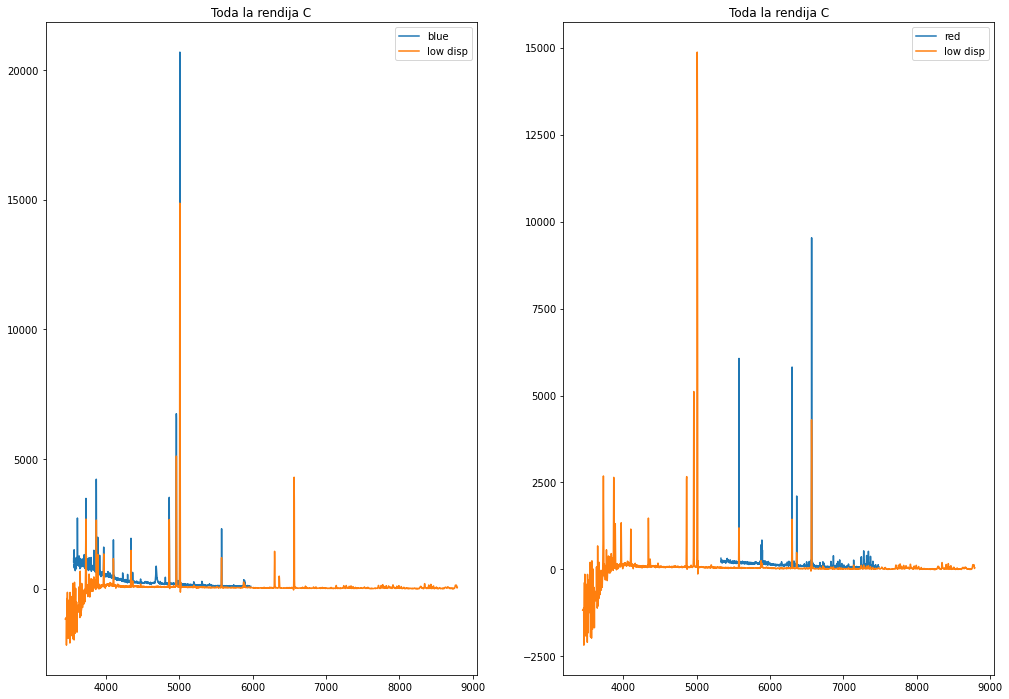

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(17,12))
#plt.subplots_adjust(hspace=0.25)
(ax1, ax2) = axes
ax1.plot(xb, yb, label='blue')
ax2.plot(xr, yr, label='red')
ax1.plot(xl, yl, label='low disp')
ax2.plot(xl, yl, label='low disp')
ax1.legend()
ax2.legend()
ax1.set_title('Toda la rendija C')
ax2.set_title('Toda la rendija C')

Ventanas individuales rendija C.

In [44]:
import numpy as np
blue=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra002.0022_mod.txt', skiprows=1, delimiter=" ")
xb, yb = np.transpose(blue)
red=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra003R.0022_mod.txt', skiprows=1, delimiter=" ")
xr, yr = np.transpose(red)
#ld=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra004L.0022.fits.txt', skiprows=1, delimiter=" ")
#xl, yl = np.transpose(ld)

(6550.0, 6580.0)

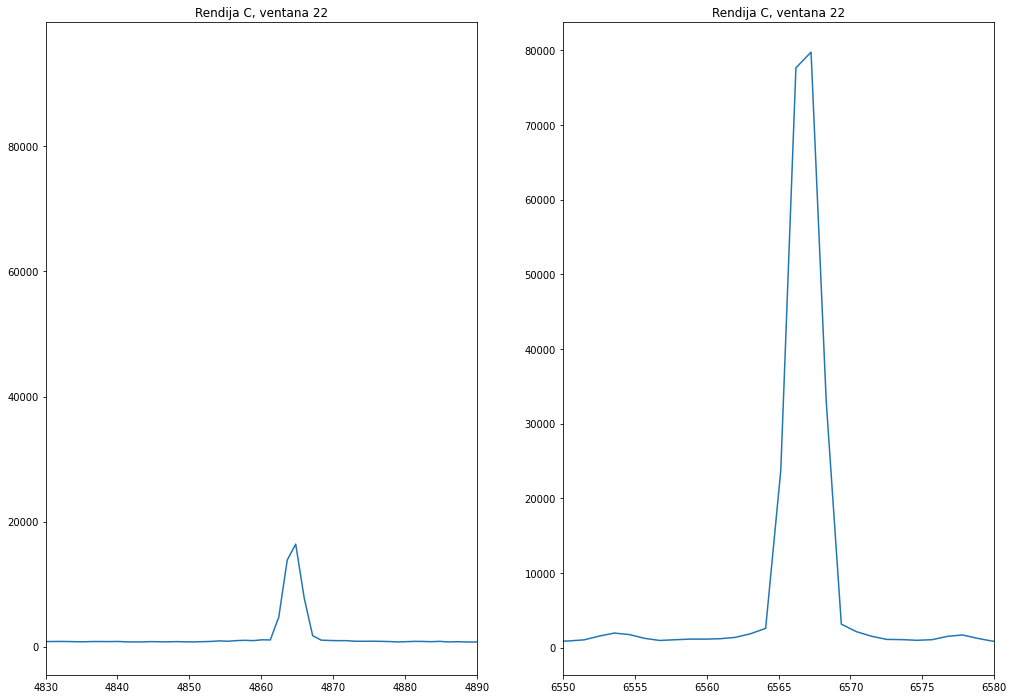

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(17,12))
plt.subplots_adjust(hspace=0.25)
(ax1, ax2) = axes
ax1.plot(xb, yb)
ax2.plot(xr, yr)
#ax1.plot(xl, yl)
#ax2.plot(xl, yl)
ax1.set_title('Rendija C, ventana 22')
ax2.set_title('Rendija C, ventana 22')

ax1.set_xlim(4830,4890)
ax2.set_xlim(6550,6580)

In [38]:
#We will try to fit the data to a function of the form
#$$y = a + b x + \sum_i A_i \exp\left(-\left(\frac{\lambda_i-\lambda_{0i}}{\sigma_i}\right)^2\right)$$
#params = [background_constant, background_slope,
#gaussian_center_1,gaussian_amplitude_1, gaussian_width_1,
#gaussian_center_2,gaussian_amplitude_2, gaussian_width_2,
#...]

def func(x, *params):
    nGauss = int((len(params)-2)/3)
    y = np.zeros_like(x)
    a = params[0]
    b = params[1]
    y = a + b*x
    for gaussian in range(nGauss):
        ctr = params[2+3*gaussian]
        amp = params[2+3*gaussian+1]
        wid = params[2+3*gaussian+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

In [41]:
guess = [100, 0,                   #continuum constant, slope
        4861, 3000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

popt, pcov = curve_fit(func, xb, yb, p0=guess)
perr = np.sqrt(np.diag(pcov))

fit = func(xb, *popt)


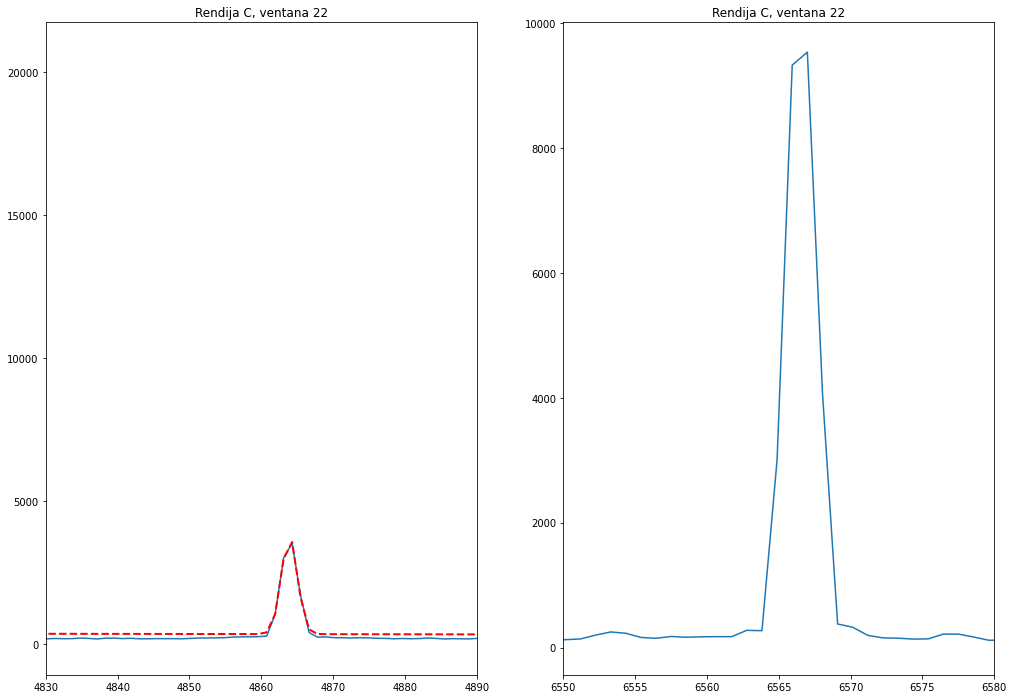

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(17,12))
plt.subplots_adjust(hspace=0.25)
(ax1, ax2) = axes
ax1.plot(xb, yb)
ax2.plot(xr, yr)
#ax1.plot(xl, yl)
#ax2.plot(xl, yl)
ax1.set_title('Rendija C, ventana 22')
ax2.set_title('Rendija C, ventana 22')

ax1.set_xlim(4830,4890)
ax2.set_xlim(6550,6580)

ax1.plot(xb, fit , color='red', linestyle='dashed', zorder=10, linewidth=2) 